# Mid-term project for DSA301

Buffalo 15

# Analysis of NYC airbnb dataset

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## Background

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. 
The dataset contain hosts from different parts of New york city along with their prices, number of reviews.

## Objective 

My objective of this project is to know which parts of NYC are in high demand for the guests, I would like to find the statistics of the reviews based on different parts of NYC and why people choose a specific part of the city.

## Research Questions

- Which hosts are the busiest and why?
- In which range of prices, we can get the most reviews?
- Is there any noticeable difference in Airbnb reservations in various areas of NYC, like Queens, Brooklyn, Manhattan etc.? What are the factors that are attributableto that difference?

In [49]:
%matplotlib inline

import pandas as pd
import requests
import seaborn as sns
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sbn
from altair import Chart, X, Y, Color, Scale
import altair as alt
from vega_datasets import data
import requests
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
#geo pandas
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [91]:
wd = pd.read_csv('AB_NYC_2019.csv',keep_default_na=False).dropna(axis=1, how='all')

# Here we are droping unnecessary columns
wd.drop(wd.columns[[0,1,2,3,10,12,14,15]], axis = 1, inplace = True) 
wd.head(10)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270,4.64
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0.10
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,74,0.59
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,49,0.40
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,430,3.47
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,118,0.99
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,160,1.33


In [74]:
wd.describe()

,latitude,longitude,price,number_of_reviews,reviews_per_month
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000
mean,40.728949,-73.952170,152.720687,23.274466,1.373221
std,0.054530,0.046157,240.154170,44.550582,1.680442
min,40.499790,-74.244420,0.000000,0.000000,0.010000
25%,40.690100,-73.983070,69.000000,1.000000,0.190000
50%,40.723070,-73.955680,106.000000,5.000000,0.720000
75%,40.763115,-73.936275,175.000000,24.000000,2.020000
max,40.913060,-73.712990,10000.000000,629.000000,58.500000


In [75]:
wd.max()

neighbourhood_group    Staten Island
neighbourhood               Woodside
latitude                     40.9131
longitude                    -73.713
room_type                Shared room
price                          10000
number_of_reviews                629
reviews_per_month               58.5
dtype: object

In [97]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(wd['longitude'], wd['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(wd, crs=crs, geometry=geometry)

Here I added a Geometry column to plot the location of hosts to a map later.

In [41]:
gdf.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,geometry
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,POINT (-73.97237 40.64749)
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,POINT (-73.98377 40.75362)
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,,POINT (-73.94190 40.80902)
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270,4.64,POINT (-73.95976 40.68514)
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0.10,POINT (-73.94399 40.79851)


## Hosts in different areas 

In [77]:
wd.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [78]:
from IPython.display import display, HTML
manhattan_num = len(wd[wd.neighbourhood_group == 'Manhattan'])
#display(HTML('<p> There are <font color="red"> 21,661 </font> hosts in Manhattan </p>'))
print("There are {} hosts in Manhattan".format(manhattan_num))

There are 21661 hosts in Manhattan


In [79]:
Brooklyn_num = len(wd[wd.neighbourhood_group == 'Brooklyn'])
print("There are {} hosts in Brooklyn".format(Brooklyn_num))

There are 20104 hosts in Brooklyn


In [80]:
Queens_num = len(wd[wd.neighbourhood_group == 'Queens'])
print("There are {} hosts in Queens".format(Queens_num))

There are 5666 hosts in Queens


In [81]:
Staten_num = len(wd[wd.neighbourhood_group == 'Staten Island'])
print("There are {} hosts in Staten Island".format(Staten_num))

There are 373 hosts in Staten Island


In [82]:
Bronx_num = len(wd[wd.neighbourhood_group == 'Bronx'])
print("There are {} hosts in Bronx".format(Bronx_num))

There are 1091 hosts in Bronx


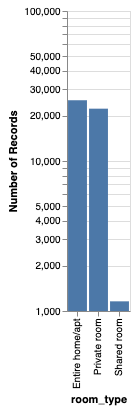

In [55]:

alt.Chart(wd).mark_bar().encode(
    alt.X('room_type'),
    alt.Y('count(room_type):Q', scale=alt.Scale(type='log'))
)


This bar chart shows the number of records of three room types which are, private, shared and entire home.

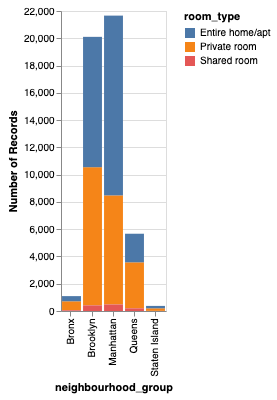

In [56]:
Chart(wd).mark_bar().encode(x='neighbourhood_group',y='count(room_type)', color='room_type', tooltip='count(room_type)').interactive()

In [809]:
display(HTML('<p> Manhattan and Brooklyn contain the largest number of hosts with: <br><font color="blue"> <b>For Manhattan: </b> </font> <br> <font color="red"> 13,199 </font> Entire home </p> <font color="red"> 7982 </font> Private room </p><font color="red"> 480 </font> Shared room </p> </p> <font color="blue"> <b>for Brooklyn:</b> <br> </font> <font color="red"> 9559 </font> Entire home </p><font color="red"> 10,132 </font> Private room </p><font color="red"> 413 </font> Shared room </p> '))

In [810]:
display(HTML('<p> There are in total:<br> <font color="red"> 22,326 </font> Private rooms </p> <br><font color="red"> 25,409 </font> Entire home or apartment </p><br><font color="red"> 1160 </font> Shared rooms </p><br>'))

## Graph and Geo Visualization 

The foucs will be on Manhataan and Brooklyn since they contain the largest number of hosts. A base map will be used to provide better visulaztion expierence.

In [58]:
import altair as alt
from vega_datasets import data

alt.Chart(wd).mark_bar().encode(
    alt.X('neighbourhood'),
    alt.Y('count(neighbourhood_group):Q'),
    color='room_type'
)

new_Manhattan = wd[wd['neighbourhood_group'] == 'Manhattan']
new_Brooklyn = wd[wd['neighbourhood_group'] == 'Brooklyn']

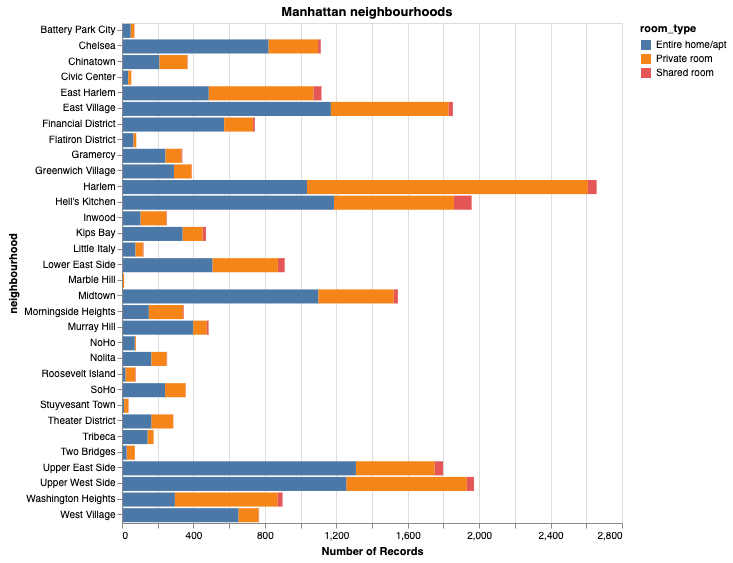

In [59]:
alt.Chart(new_Manhattan).mark_bar().encode(
    x='count(neighbourhood)',
    y='neighbourhood',
    color='room_type',
    tooltip='count(room_type)',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'room_type',
      sort='ascending'
    )
).properties(
    width=500,
    height=500,
    title='Manhattan neighbourhoods'
)

This bar chart shows the number of hosts in each neighborhood with numbers of different type of rooms

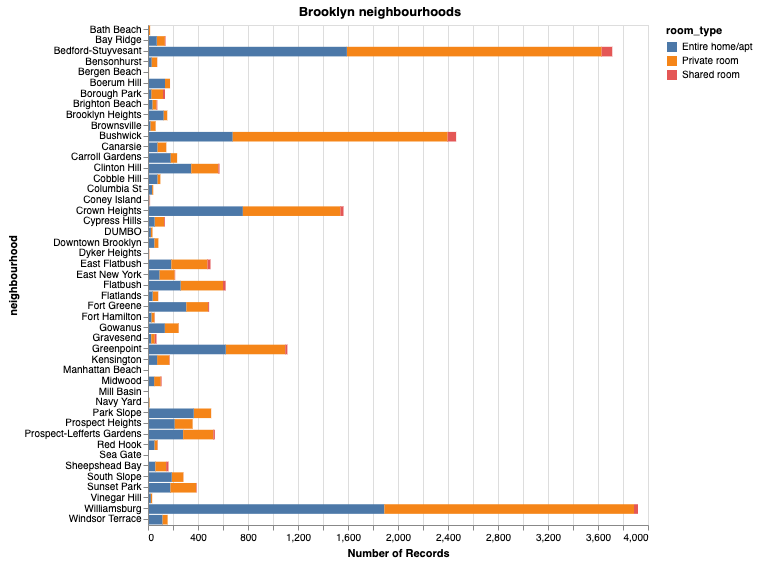

In [60]:
alt.Chart(new_Brooklyn).mark_bar().encode(
    x='count(neighbourhood)',
    y='neighbourhood',
    color='room_type',
    tooltip='count(room_type)',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'room_type',
      sort='ascending'
    )
).properties(
    width=500,
    height=500,
    title='Brooklyn neighbourhoods'
)

This bar chart shows the number of hosts in each neighborhood with numbers of different type of rooms

In [61]:
# Converting the datatype in the number of reviews and reviews per month to a float
wd['reviews_per_month'] = pd.to_numeric(wd.reviews_per_month)
wd['number_of_reviews'] = pd.to_numeric(wd.number_of_reviews)
wd['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

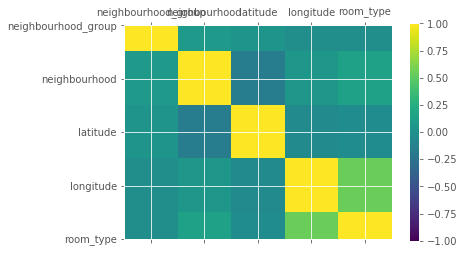

,latitude,longitude,price,number_of_reviews,reviews_per_month
latitude,1.000000,0.084788,0.033939,-0.015389,-0.010142
longitude,0.084788,1.000000,-0.150019,0.059094,0.145948
price,0.033939,-0.150019,1.000000,-0.047954,-0.030608
number_of_reviews,-0.015389,0.059094,-0.047954,1.000000,0.549868
reviews_per_month,-0.010142,0.145948,-0.030608,0.549868,1.000000


In [88]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
names = wd.columns
data = wd
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
wd.corr()

The correlation between number_of_reviews and reviews_per_month equals: '0.549868'
Which means that it is not a perfect linear relationship but still indicate a moderate uphill positive  relationship 

In [816]:
wd['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

On average, Hosts in NYC have 23 reviews 

In [817]:
wd_Manh = wd[wd['neighbourhood_group'] == 'Manhattan']
wd_Manh['number_of_reviews'].describe()

count    21661.000000
mean        20.985596
std         42.572277
min          0.000000
25%          1.000000
50%          4.000000
75%         19.000000
max        607.000000
Name: number_of_reviews, dtype: float64

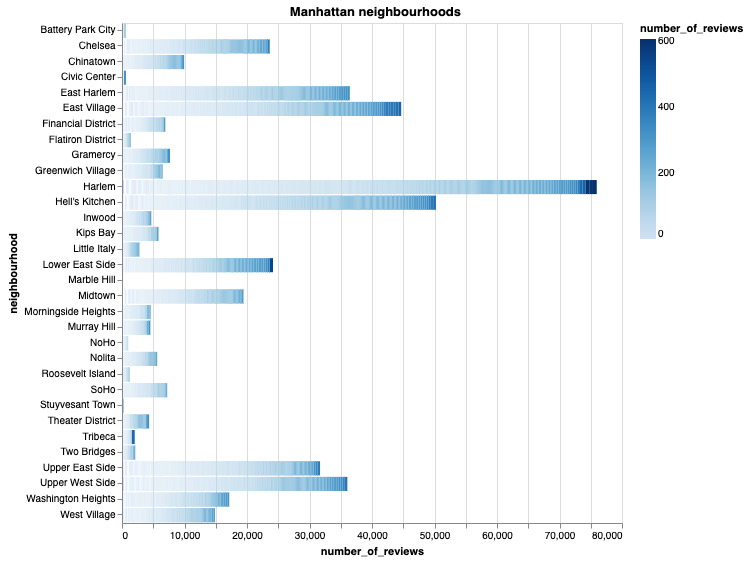

In [72]:
alt.Chart(new_Manhattan).mark_bar().encode(
    x='number_of_reviews',
    y='neighbourhood',
    color='number_of_reviews',
    tooltip='reviews_per_month',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'number_of_reviews',
      sort='ascending'
    )
).properties(
    width=500,
    height=500,
    title='Manhattan neighbourhoods'
)

This chart shows the number of reviews in each neighborhood, with Harlem being the highest.

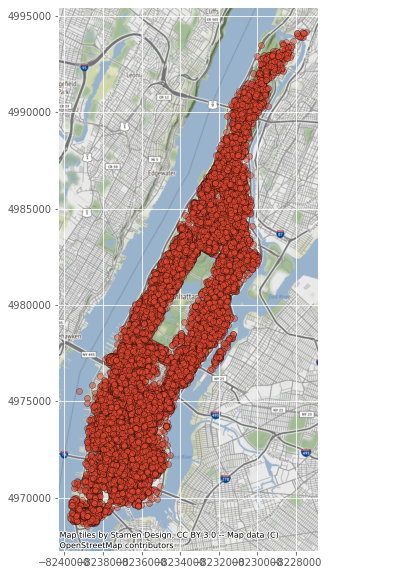

In [99]:
import contextily as ctx

#Importing NYC base map
gdf_all = gpd.read_file('Neighborhood Tabulation Areas (NTA) (1).geojson')

#Coordinate reference system
gdf_all = gdf_all.to_crs({'init': 'epsg:3857'})
gdf = gdf.to_crs({'init': 'epsg:3857'})

#Placing the points on the map
joined_all = gpd.sjoin(gdf_all,gdf,how='inner')
gdf_ = gpd.sjoin(gdf,gdf,how='inner')

#Plotting all points 
manhat_area_plot = gdf[gdf['neighbourhood_group'] == 'Manhattan']
temp = gpd.sjoin(manhat_area_plot,manhat_area_plot,how='inner')
ax_manh = temp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',zorder=1, legend=True)
ctx.add_basemap(ax_manh)

On average, Hosts in Manhattan area have 21 reviews with a standard deviation of 42 reviews.

The map above shows hosts distribution in Manhattan.

In [820]:
harlem = wd[wd['neighbourhood'] == 'Harlem']
harlem['number_of_reviews'].sum()

75962

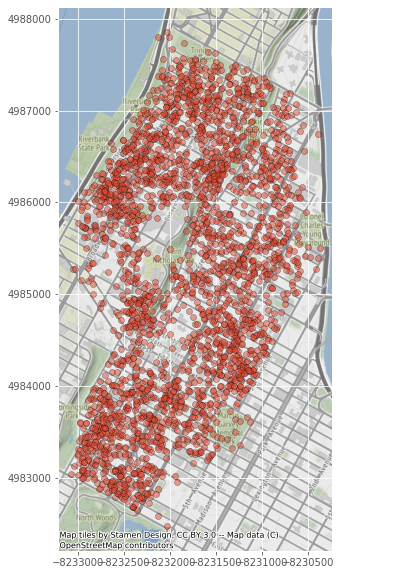

In [821]:
Harlem_wd = gdf[gdf['neighbourhood'] == 'Harlem']
Harlem_plot = gpd.sjoin(Harlem_wd,Harlem_wd,how='inner')
ax_harlem = Harlem_plot.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',zorder=1, legend=True)
ctx.add_basemap(ax_harlem)

Harlem neighbourhood cointain the most reviews with a total of 75,962 review.

The map above shows hosts distribution in Harlem.

In [822]:
wd_Manh = wd[wd['neighbourhood_group'] == 'Brooklyn']
wd_Manh['number_of_reviews'].describe()

count    20104.000000
mean        24.202845
std         44.344868
min          0.000000
25%          1.000000
50%          6.000000
75%         25.000000
max        488.000000
Name: number_of_reviews, dtype: float64

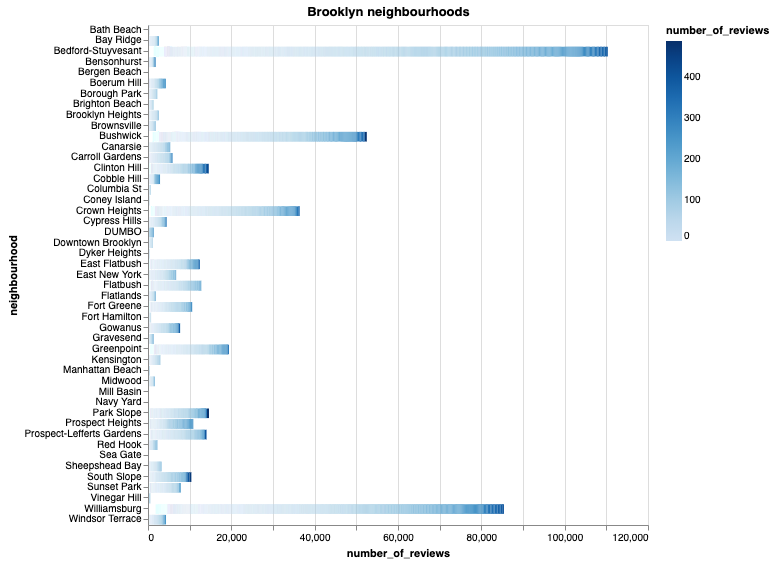

In [73]:
alt.Chart(new_Brooklyn).mark_bar().encode(
    x='number_of_reviews',
    y='neighbourhood',
    color='number_of_reviews',
    tooltip='reviews_per_month',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'number_of_reviews',
      sort='ascending'
    )
).properties(
    width=500,
    height=500,
    title='Brooklyn neighbourhoods'
)

This chart shows the number of reviews in each neighborhood, with bedford-Stuyvesant being the highest.

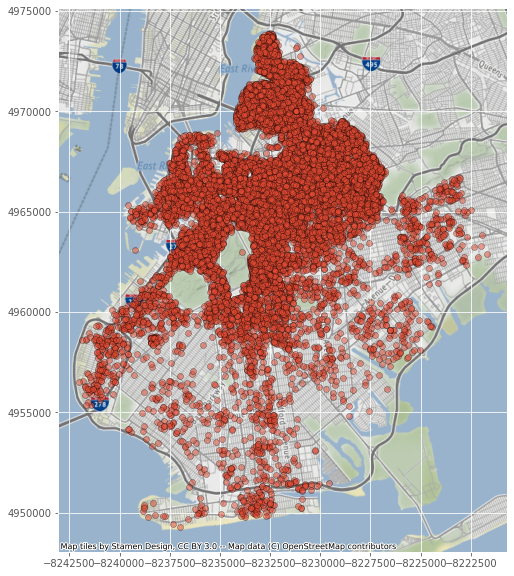

In [824]:
brooklyn_area_plot = gdf[gdf['neighbourhood_group'] == 'Brooklyn']
Brooklyn_plot = gpd.sjoin(brooklyn_area_plot,brooklyn_area_plot,how='inner')
ax_brooklyn = Brooklyn_plot.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',zorder=1, legend=True)
ctx.add_basemap(ax_brooklyn)

On average, Hosts in Brooklyn area have 24 reviews with a standard deviation of 44 reviews.

The map above shows hosts distribution in Brooklyn.

In [825]:
bedford_stuyvesant = wd[wd['neighbourhood'] == 'Bedford-Stuyvesant']
bedford_stuyvesant['number_of_reviews'].sum()

110352

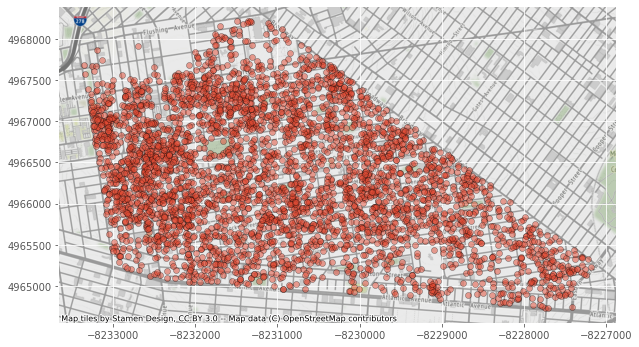

In [826]:
Bedford_wd = gdf[gdf['neighbourhood'] == 'Bedford-Stuyvesant']
Bedford_plot = gpd.sjoin(Bedford_wd,Bedford_wd,how='inner')
ax_bedford = Bedford_plot.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',zorder=1, legend=True)
ctx.add_basemap(ax_bedford)

The map above shows hosts distribution in bedford-Stuyvesant.

Bedford-Stuyvesant neighbourhood cointain the most reviews with a total of 110,352 review

Harlem and Bedford-Stuyvesant neighborhoods contain largest number of hosts and reviews with total of 186,314 out of 1,138,005 review

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,geometry
2031,Manhattan,Harlem,40.82085,-73.94025,Private room,49,607,7.75,POINT (-8230990.979 4985952.884)
2030,Manhattan,Harlem,40.82124,-73.93838,Private room,49,597,7.72,POINT (-8230782.812 4986010.253)
2015,Manhattan,Harlem,40.82264,-73.94041,Private room,49,594,7.57,POINT (-8231008.790 4986216.197)
225,Manhattan,Harlem,40.82510,-73.94287,Private room,60,458,4.58,POINT (-8231282.636 4986578.081)
1125,Manhattan,Harlem,40.82537,-73.94392,Private room,85,439,5.12,POINT (-8231399.522 4986617.801)


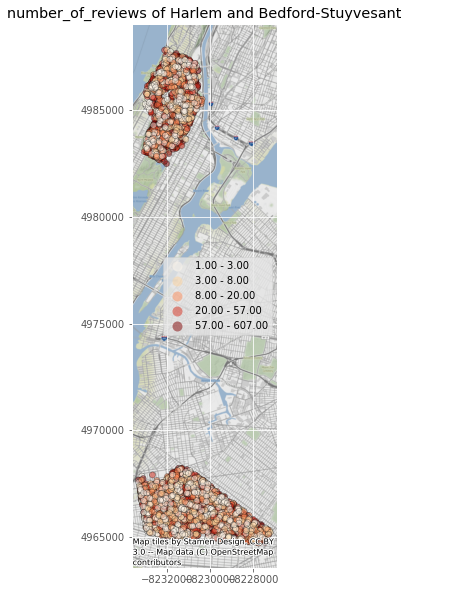

In [100]:
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
import geoplot as gplt

gdf_temp = gdf[(gdf['number_of_reviews'] > 0) & ((gdf['neighbourhood'] == 'Harlem') | (gdf['neighbourhood'] == 'Bedford-Stuyvesant'))]
axxx = gdf_temp.plot(figsize=(2.6*10,10), alpha=0.5, edgecolor='k',zorder=1, legend=True,column='number_of_reviews', cmap='OrRd', scheme='Quantiles',k=5)
ctx.add_basemap(axxx)
axxx.set_title("number_of_reviews of Harlem and Bedford-Stuyvesant")
gdf_temp.nlargest(5, 'number_of_reviews')

## Range of prices 

/Users/muhammedzoyed/opt/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


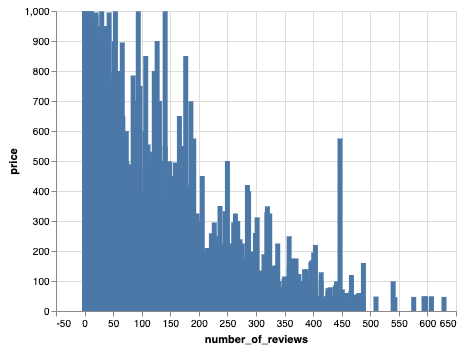

In [92]:
wd = wd[wd['price'] < 1000]
Chart(wd).mark_bar().encode(x='number_of_reviews',y='price').interactive()

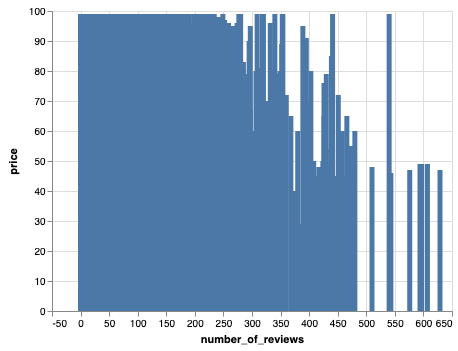

In [93]:
temp = wd[wd['price'] < 100]
Chart(temp).mark_bar().encode(x='number_of_reviews',y='price').interactive()

The number of reviews Inversely proportional with the price, and most reviews are between $45-60

In [94]:
display(HTML('<p> The rent average in Manhattan is <font color="red"> $196 </font> per night, with a standard deviation of <font color="red"> $291 </font> while the median is <font color="red"> $150 </font></p>'))
new_Manhattan.describe()

,latitude,longitude,price,number_of_reviews
count,21661.000000,21661.000000,21661.000000,21661.000000
mean,40.765062,-73.974607,196.875814,20.985596
std,0.038463,0.022138,291.383183,42.572277
min,40.702340,-74.018510,0.000000,0.000000
25%,40.731820,-73.991690,95.000000,1.000000
50%,40.760880,-73.980420,150.000000,4.000000
75%,40.795090,-73.953840,220.000000,19.000000
max,40.876650,-73.908550,10000.000000,607.000000


In [95]:
display(HTML('<p> The rent average in Brooklyn is <font color="red"> $124 </font> per night, with a standard deviation of <font color="red"> $186 </font>while the median is <font color="red"> $90 </font></p>'))
new_Brooklyn.describe()

,latitude,longitude,price,number_of_reviews
count,20104.000000,20104.000000,20104.000000,20104.000000
mean,40.685036,-73.951190,124.383207,24.202845
std,0.027397,0.025482,186.873538,44.344868
min,40.571150,-74.039420,0.000000,0.000000
25%,40.672590,-73.963500,60.000000,1.000000
50%,40.687520,-73.951740,90.000000,6.000000
75%,40.704963,-73.935907,150.000000,25.000000
max,40.738900,-73.856760,10000.000000,488.000000


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,geometry
1899,Manhattan,Chelsea,40.74660,-73.99219,Private room,999,30,0.40,POINT (-8236772.913 4975036.765)
9092,Manhattan,Little Italy,40.72039,-73.99683,Entire home/apt,999,1,0.02,POINT (-8237289.436 4971186.323)
10520,Brooklyn,Clinton Hill,40.69242,-73.96828,Entire home/apt,999,141,3.04,POINT (-8234111.264 4967078.996)
14629,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,94,2.85,POINT (-8234558.769 4967330.056)
15091,Manhattan,Greenwich Village,40.73426,-73.99476,Entire home/apt,999,11,0.28,POINT (-8237059.005 4973223.739)


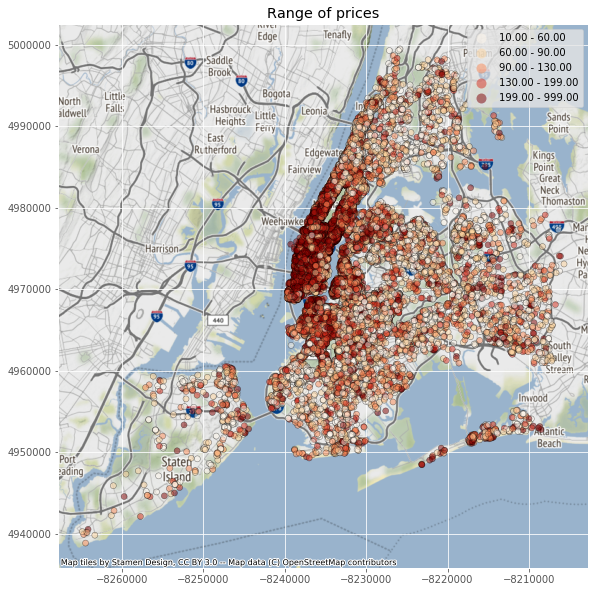

In [101]:
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
import geoplot as gplt

gdf = gdf[gdf['price'] > 0]
axx = gdf.plot(figsize=(2.6*10,10), alpha=0.5, edgecolor='k',zorder=1, legend=True,column='price', cmap='OrRd', scheme='Quantiles',k=5)
ctx.add_basemap(axx)
axx.set_title("Range of prices")
gdf.nlargest(5, 'price')

The map above shows a range of prices for different hosts in NYC.

In [ ]:
gdf.head()

## Conclusions 

Most guests choose either Manhattan or Brooklyn to book their stay. People choose Bedford-Stuyvesant neighborhood because the price per night is affordable compared to the location, meaning close to Manhattan; a similar price idea goes with Harlem neighborhood in Manhattan. Most tourists choose hosts with prices below $60 in NYC.

Williamsburg neighborhood contains a larger number of hosts than Bedford-Stuyvesant but fewer reviews, and the reason might be the bridge that links Williamsburg to Lower Manhattan; however, since we are looking for the busiest neighborhoods Williamsburg is less busy than Bedford-Stuyvesant.